In [4]:

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
import bokeh.palettes
from bokeh.transform import factor_cmap
from math import floor
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.resources import CDN
from bokeh.embed import file_html

%config InlineBackend.figure_format = 'retina'

In [5]:
output_notebook()

Loading BokehJS ...

In [6]:
data = pd.read_csv('C:\\Users\\User\\tmdb_Cleaned.csv')

In [7]:
data["profit"] = data["revenue"] - data["budget"]

In [8]:
profit_by_month_year = data[data["year"]>1990].groupby(["year","month"]).profit.mean().reset_index()
count_by_month_year = data[data["year"]>1990].groupby(["year","month"]).size().reset_index()

In [9]:
profit_by_month_year[:3]

year  month       profit
0  1991      1   -7103420.0
1  1991      2  253742922.0
2  1991      3   24708446.5

In [10]:
newdata = ColumnDataSource(profit_by_month_year)

mapper = LinearColorMapper(palette=bokeh.palettes.RdBu[9], 
                           low=profit_by_month_year["profit"].min(), high=profit_by_month_year["profit"].max())


hover = HoverTool(
    tooltips=[
        ("profit", "@profit{$,}"),
    ]
)    

TOOLS = [hover,"save,pan,box_zoom,reset,wheel_zoom"]


p = figure(x_axis_label = 'Year', 
           y_axis_label = 'Month',
           tools=TOOLS,
           plot_width = 900)

p.rect(x="year", y="month",width=1, height=1,source = newdata,
       fill_color={'field': 'profit', 'transform': mapper})

color_bar = ColorBar(color_mapper=mapper, location=(20, 0), label_standoff=18,
                     ticker= AdaptiveTicker(), formatter = NumeralTickFormatter(format="$,") )

p.add_layout(color_bar, 'right')

p.title.text = "Movie Profit by Year and Month"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

In [11]:
df1 = pd.concat([pd.Series(row['year'], row['genres'].replace('[','').replace(']','').replace("'","").split(','))              
                    for _, row in data[data["year"]>1990][["year","genres"]].iterrows()]).reset_index()
df2 = pd.concat([pd.Series(row['profit'], row['genres'].replace('[','').replace(']','').replace("'","").split(','))              
                    for _, row in data[data["year"]>1990][["profit","genres"]].iterrows()]).reset_index()

In [12]:
df1.columns = ["genres","year"]
df2.columns = ["genres","profit"]

In [13]:

df1.shape, df2.shape

((10723, 2), (10723, 2))

In [14]:
df1["profit"] = df2["profit"]
df1["genres"] = df1["genres"].apply(lambda x: x.strip())
del df2

In [16]:
genres = ["Drama","Comedy","Action","Adventure","Crime","Science", "Fiction","Family"]

In [17]:
grouped_data = df1[df1["genres"].isin(genres)].groupby(["genres","year"]).profit.mean().reset_index()

In [18]:
dict_group_data = {"xs":[grouped_data.loc[(grouped_data["genres"]==name),"year"].values \
                         for name in grouped_data['genres'].unique()],
                  "ys": [grouped_data.loc[(grouped_data["genres"]==name),"profit"].values\
                         for name in grouped_data['genres'].unique()],
                  "labels": grouped_data["genres"].unique(),
                  "color": bokeh.palettes.Category10[9]}

source = ColumnDataSource(dict_group_data)

hover = HoverTool(tooltips=[
    ("Genre", "@labels"),
])

p = figure(x_axis_label = 'Year', 
           y_axis_label = 'Profit', 
           width = 1000,
           tools=[hover, "save","pan","box_zoom","reset","wheel_zoom"]) 
p.yaxis[0].formatter = NumeralTickFormatter(format="$,")

p.multi_line(xs= "xs", ys= "ys", line_color= "color", source = source, legend = "labels",line_width=3)
p.legend.location = "top_left"

p.title.text = "Profit for each Genre across years"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)


In [19]:

data["profit"].corr(data["popularity"])

0.6206384045302823

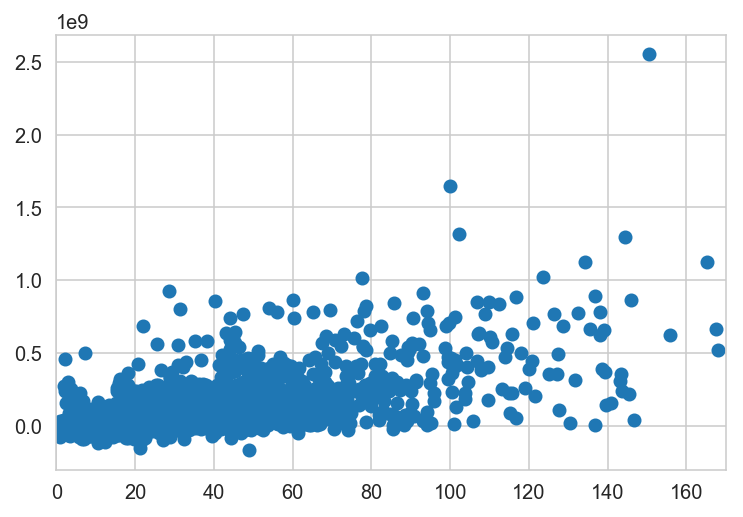

In [20]:
plt.scatter(data["popularity"],data["profit"])
plt.xlim([0,170])
plt.show()

In [24]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [25]:
data["decade"] = data["year"].apply(extract_decade)

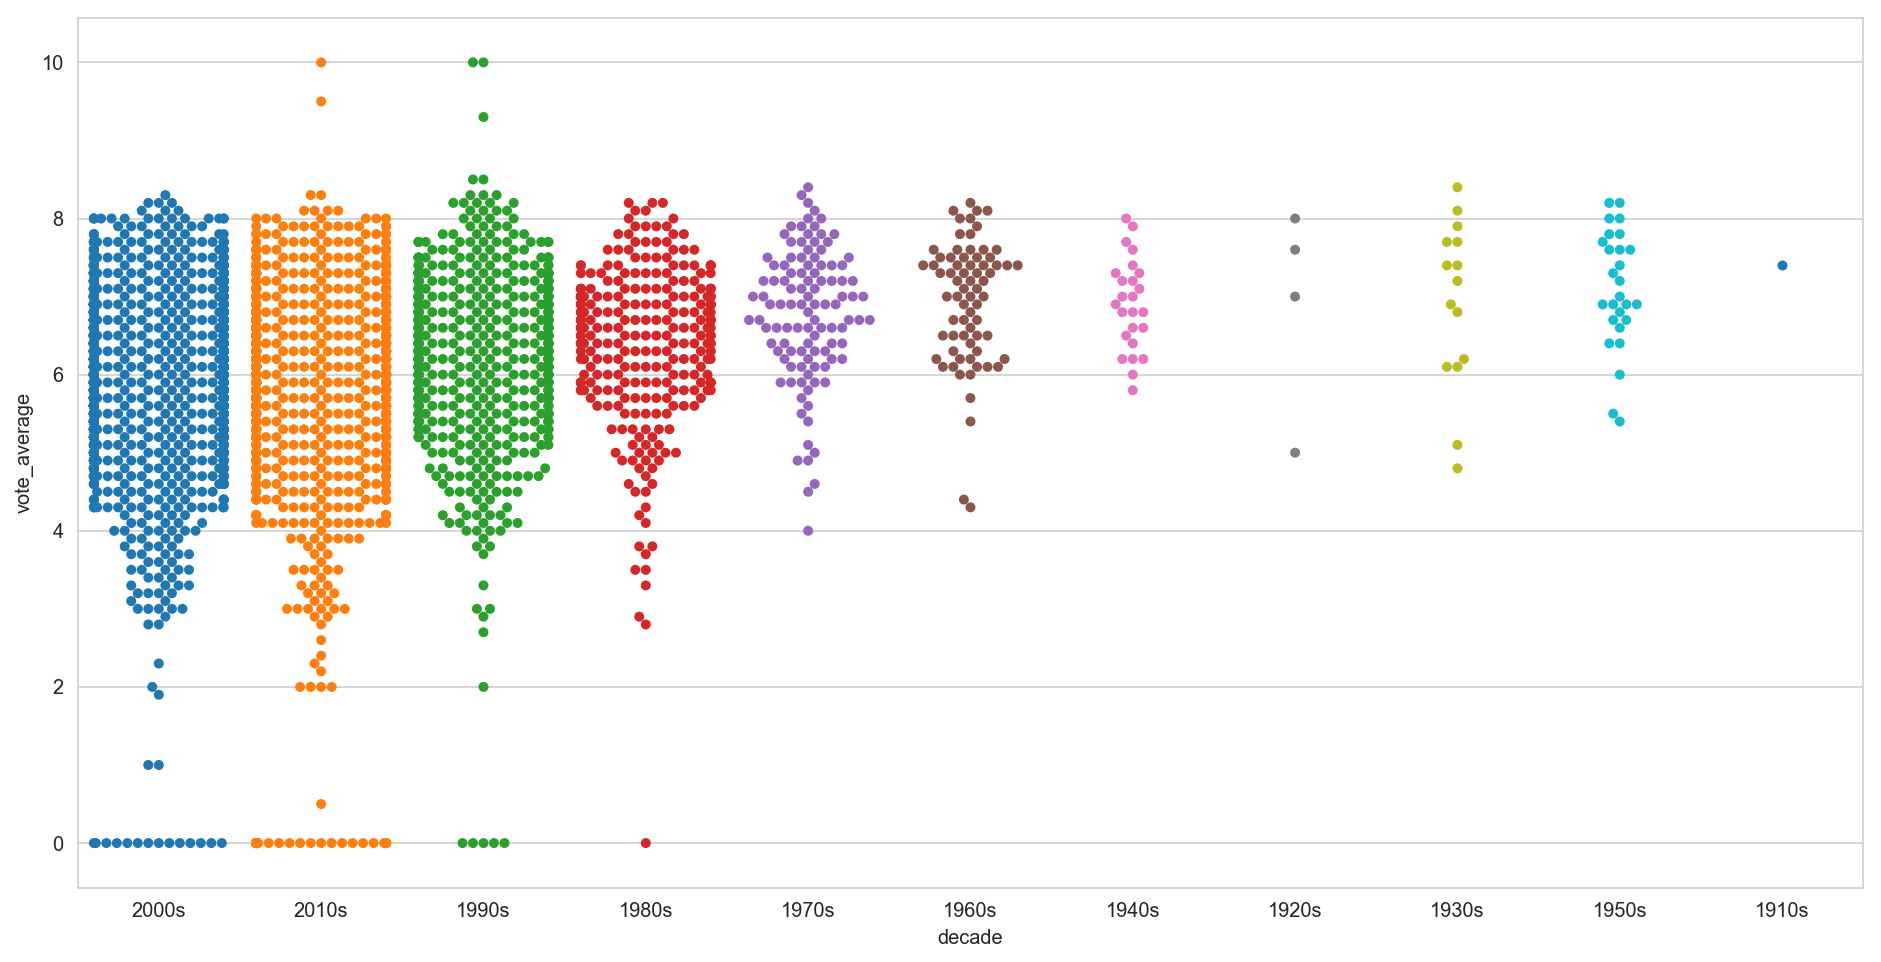

In [26]:
fig=plt.figure(figsize=(16, 8))
sns.swarmplot(x="decade", y="vote_average", data=data , palette="tab10" )
plt.show()